<a href="https://colab.research.google.com/github/fernandotoscano/BIOINFORMATICS/blob/main/rdkit_pip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 16.3 MB/s eta 0:00:00


In [2]:
!cat  /etc/lsb-release


DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.3 LTS"


In [3]:
import sys
print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor', '/root/.ipython']


In [5]:
import rdkit
from rdkit import Chem
from IPython import display
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
import pandas as pd

In [7]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')


In [8]:
import numpy as np
from rdkit.Chem import Descriptors, Lipinski

In [9]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [10]:
df_lipinski = lipinski(df.canonical_smiles)

In [11]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
240,328.466,3.34562,1.0,5.0
241,222.379,-1.99300,1.0,3.0
242,485.559,0.54470,5.0,7.0
243,222.379,-1.99300,1.0,3.0


In [12]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,inactive
...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,NaN
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,NaN
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,NaN
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN


In [13]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [14]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,inactive,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,inactive,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,active,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,active,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,inactive,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,380.19,NaN,328.466,3.34562,1.0,5.0
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.00,NaN,222.379,-1.99300,1.0,3.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,161.00,NaN,485.559,0.54470,5.0,7.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],165.96,NaN,222.379,-1.99300,1.0,3.0


In [15]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

In [16]:
df_combined.standard_value.describe()

,standard_value
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [17]:
-np.log10( (10**-9)* 100000000 )

1.0

In [18]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [21]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [22]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,1.89262,0.0,5.0,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,3.81320,0.0,2.0,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,2.66050,0.0,4.0,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,3.63080,0.0,3.0,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,3.53900,0.0,5.0,2000.00
...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,NaN,328.466,3.34562,1.0,5.0,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,165.00
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,NaN,485.559,0.54470,5.0,7.0,161.00
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],NaN,222.379,-1.99300,1.0,3.0,165.96


In [ ]:
#import rdkit.Chem.Lipinski as Lipinsky

In [ ]:
#Lipinsky.NumHAcceptors(mol)

2

In [ ]:
#from rdkit.Chem.Draw import SimilarityMaps

In [ ]:
#fp = SimilarityMaps.GetMorganFingerprint(mol)
3fp2 = SimilarityMaps.GetMorganFingerprint(mol2)

In [ ]:
#from rdkit import DataStructs

In [ ]:
#DataStructs.TanimotoSimilarity(fp, fp2)

0.4583333333333333

0.10802469135802462


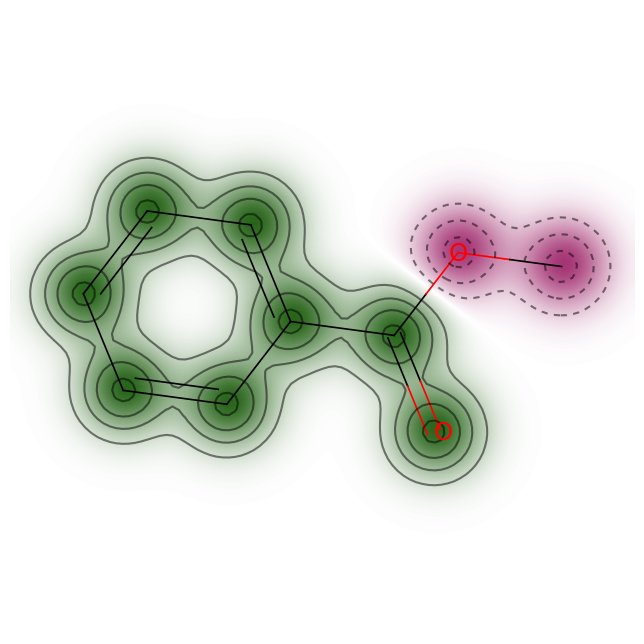

In [ ]:
fig,maxw = SimilarityMaps.GetSimilarityMapForFingerprint(mol, mol2,SimilarityMaps.GetAPFingerprint)
print(maxw)


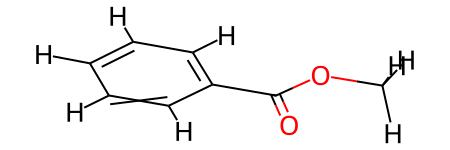

In [ ]:
mol3d = Chem.AddHs(mol2)
Chem.AllChem.EmbedMolecule(mol3d)
mol3d

In [ ]:
Chem.AllChem.MMFFOptimizeMolecule(mol3d, mmffVariant='MMFF94', maxIters=200, nonBondedThresh=200)

0

In [ ]:
conf = mol3d.GetConformer(0)
conf.GetPositions()

array([[-1.18706676, -0.618152  , -1.06765754],
       [-2.53882799, -0.37591112, -0.81497762],
       [-2.91654404,  0.36655857,  0.30290343],
       [-1.94573935,  0.86789655,  1.16952934],
       [-0.59208053,  0.62766611,  0.92014336],
       [-0.204402  , -0.11802068, -0.20182012],
       [ 1.22167588, -0.40521078, -0.51747889],
       [ 1.58090012, -1.05220578, -1.48887464],
       [ 2.04024127,  0.14651129,  0.41347765],
       [ 3.42878405, -0.08824597,  0.17577431],
       [-0.90248212, -1.19899998, -1.94319077],
       [-3.29568242, -0.76679063, -1.49065791],
       [-3.9694211 ,  0.55484054,  0.49909758],
       [-2.24265016,  1.44674103,  2.04082951],
       [ 0.14779311,  1.02786073,  1.608732  ],
       [ 3.64546182, -1.16093121,  0.19616365],
       [ 3.99567407,  0.39446419,  0.97663503],
       [ 3.73436613,  0.35192915, -0.77862838]])

In [ ]:
data = []
for i in range(2):
  data.append(pc.get_compounds(identifier='[#6][N;X2]-[N;+]#N', namespace='smiles',
                               searchtype='substructure',  as_dataframe=True,
                               listkey_count=100, listkey_start=i))

In [ ]:
alldata = pandas.concat(data)
smiles = alldata['canonical_smiles'].values

In [ ]:
alldata

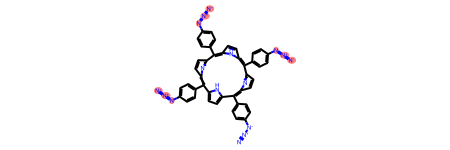

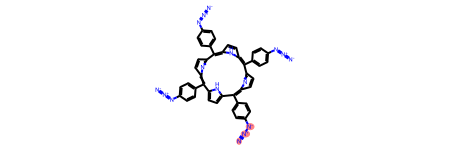

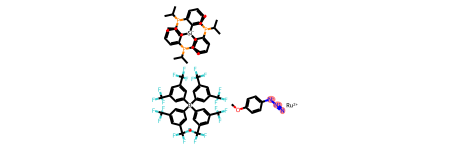

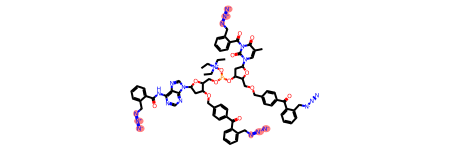

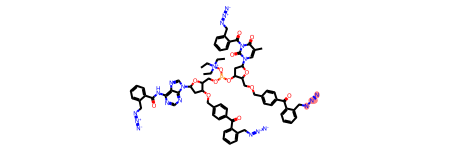

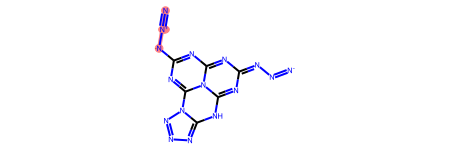

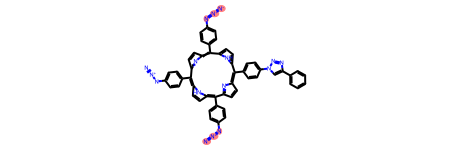

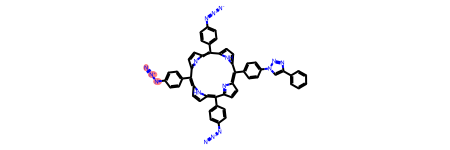

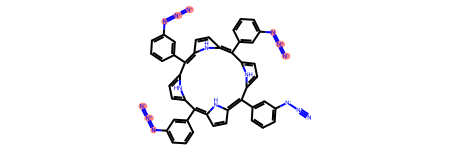

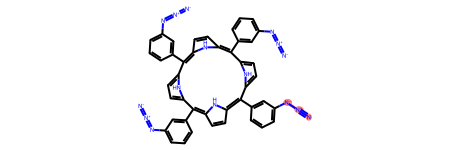

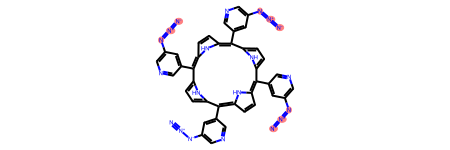

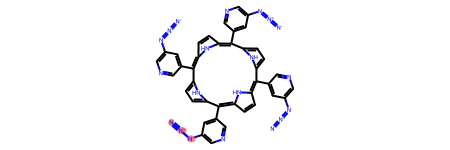

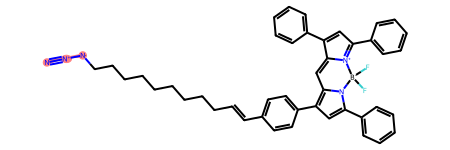

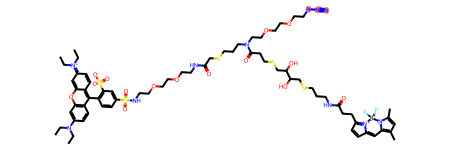

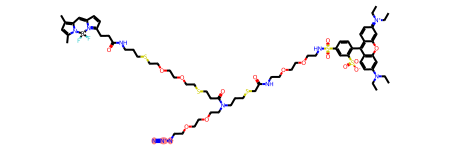

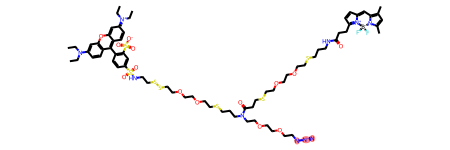

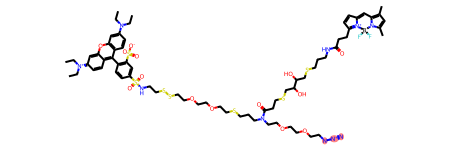

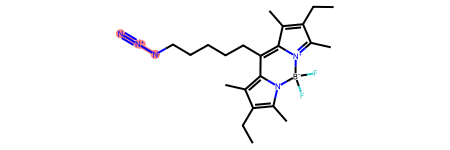

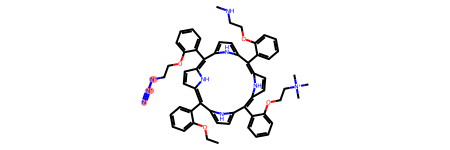

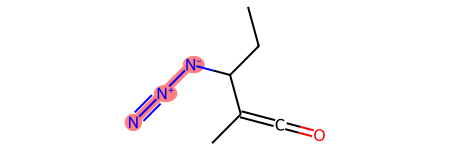

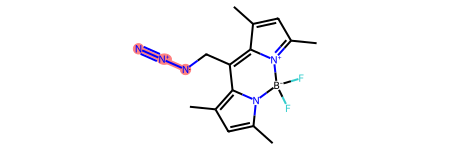

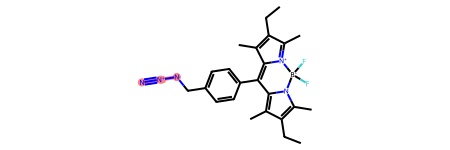

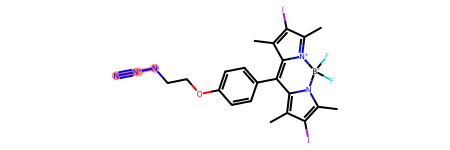

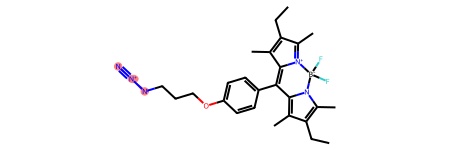

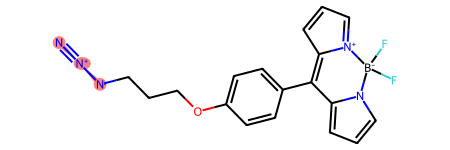

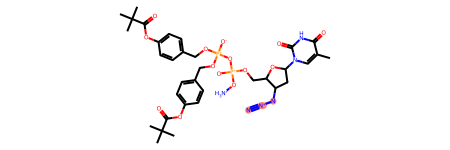

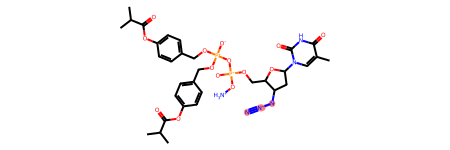

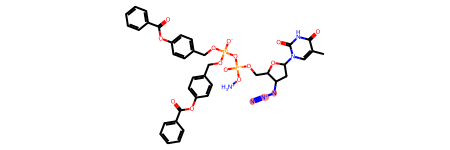

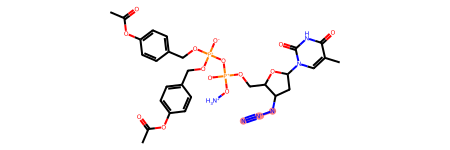

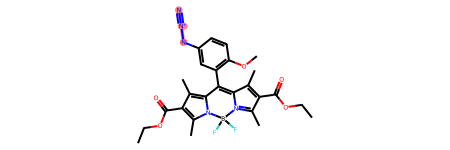

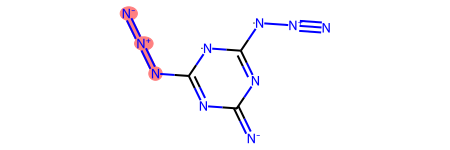

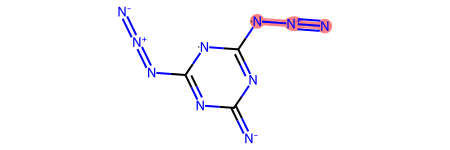

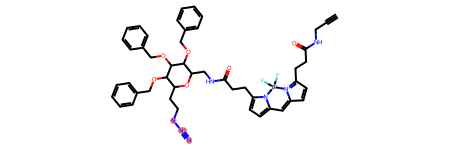

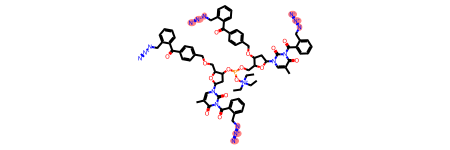

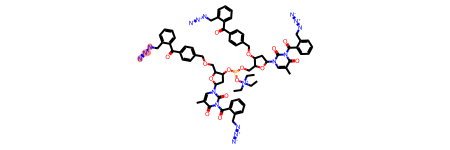

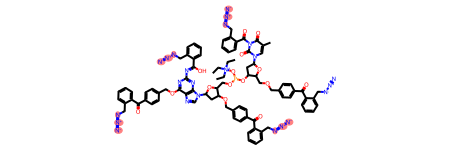

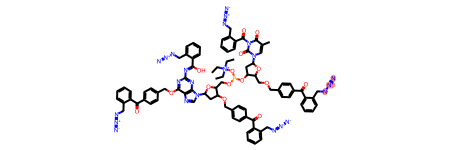

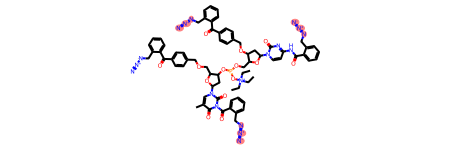

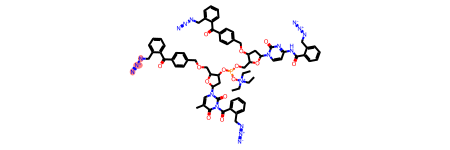

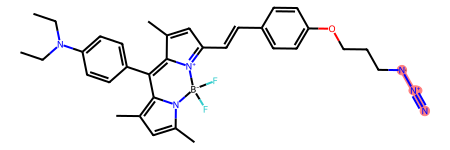

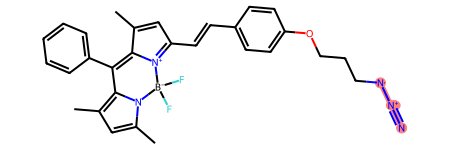

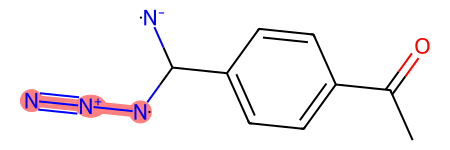

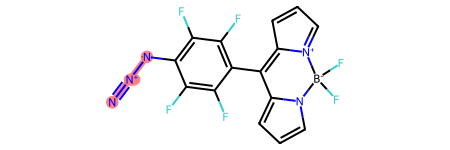

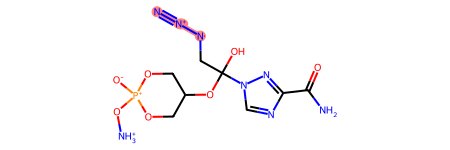

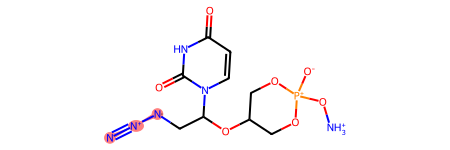

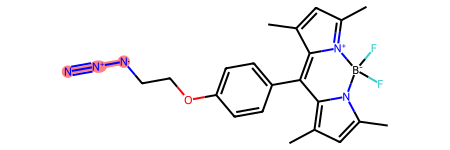

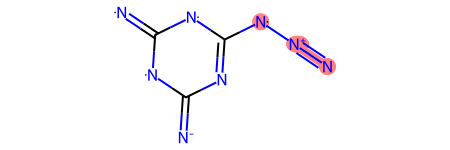

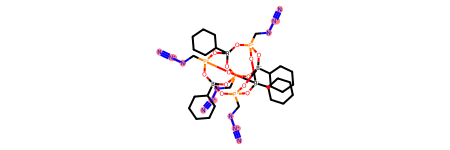

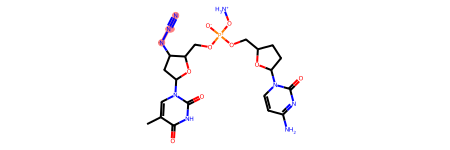

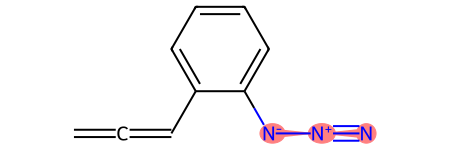

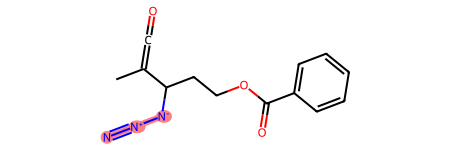

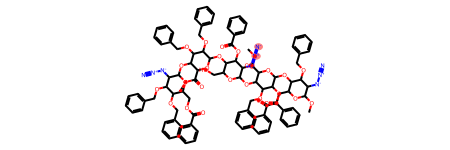

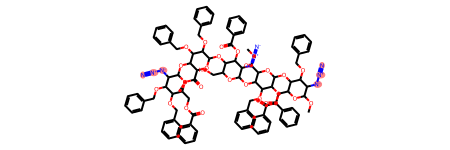

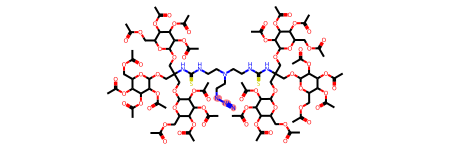

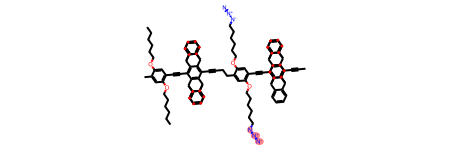

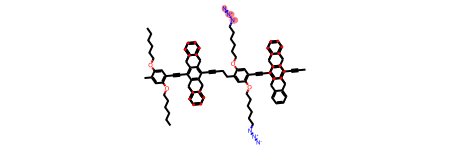

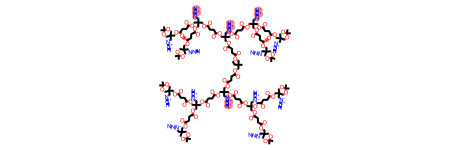

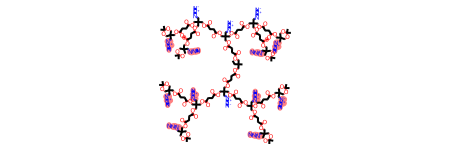

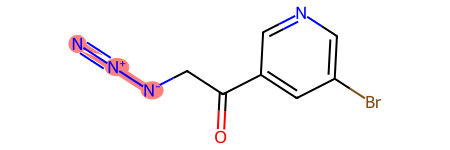

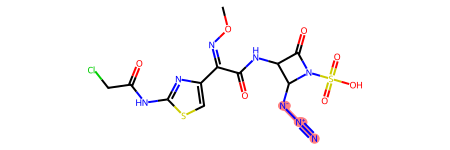

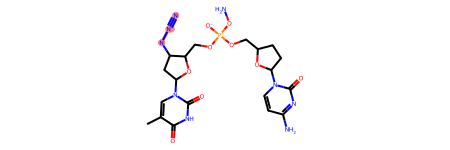

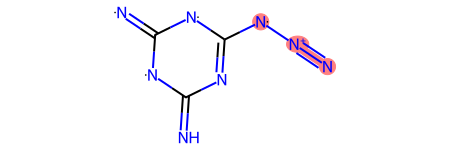

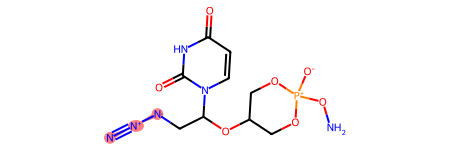

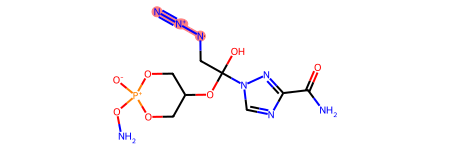

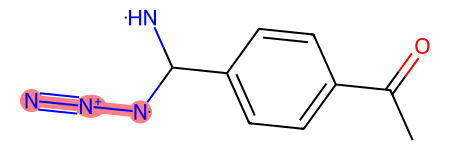

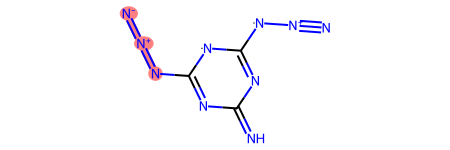

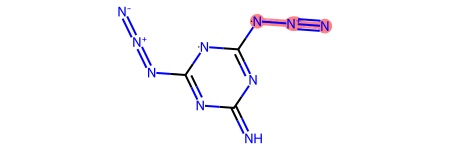

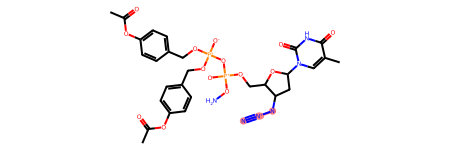

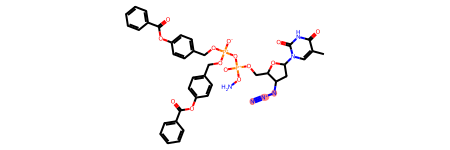

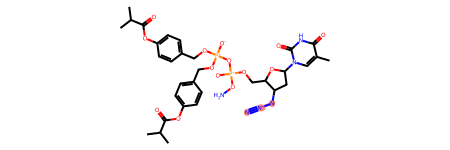

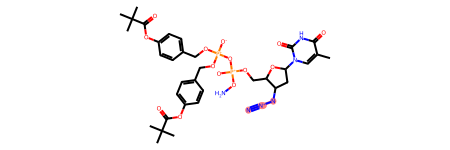

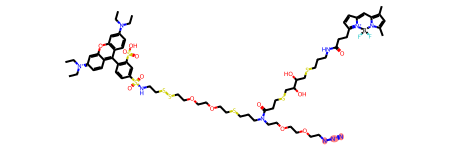

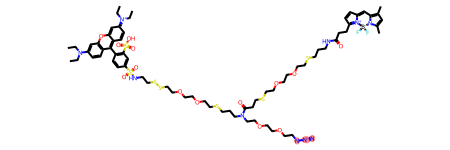

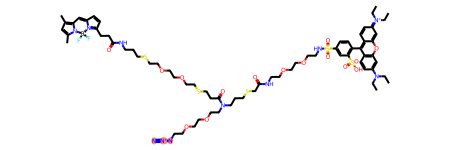

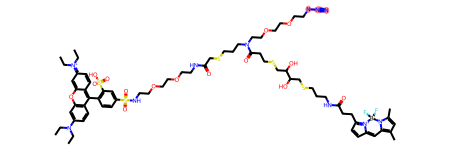

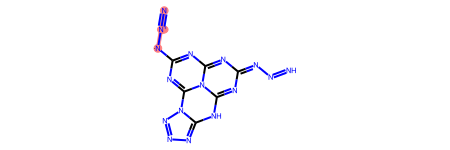

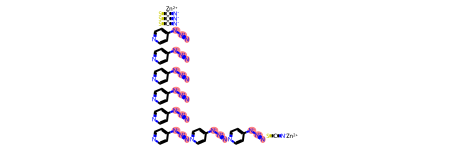

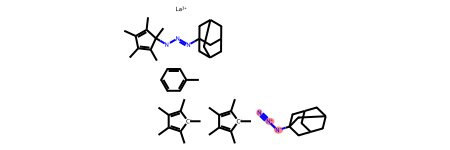

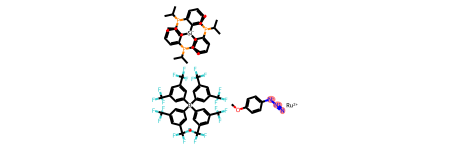

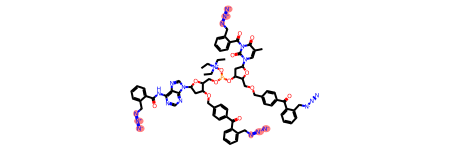

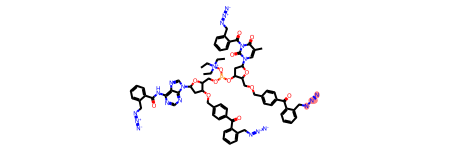

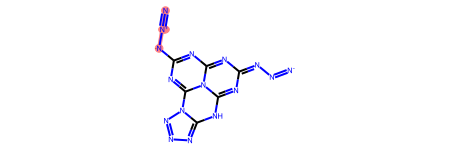

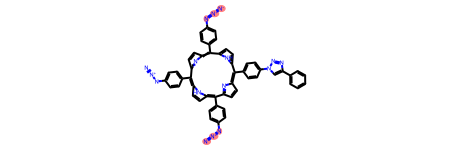

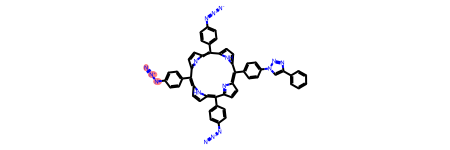

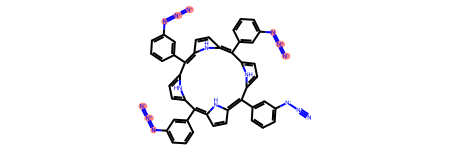

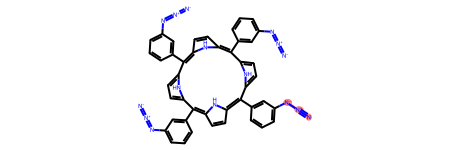

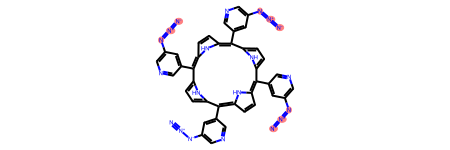

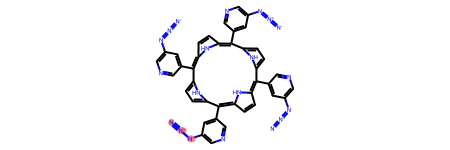

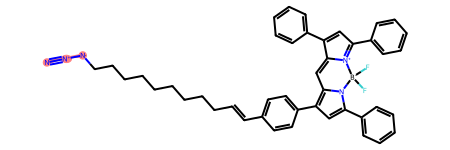

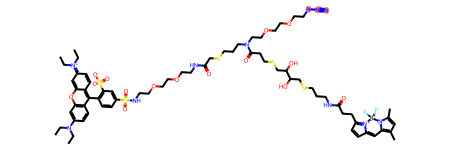

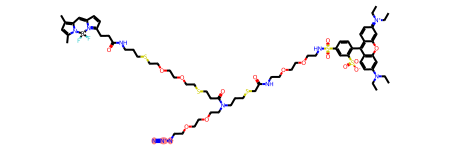

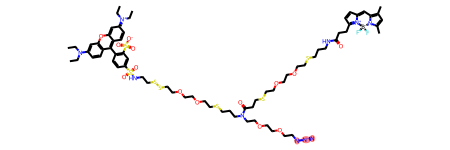

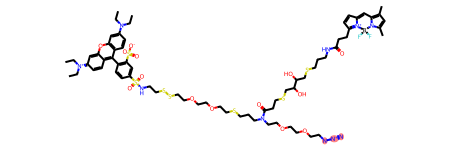

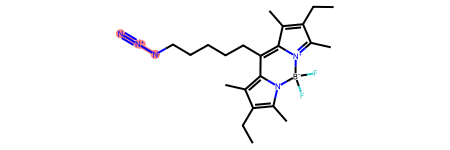

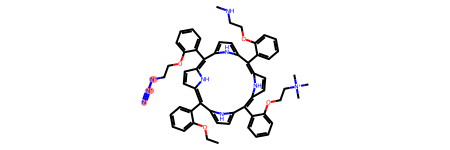

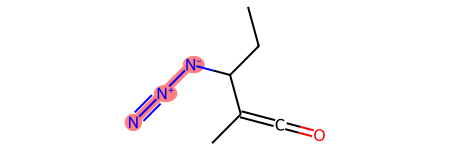

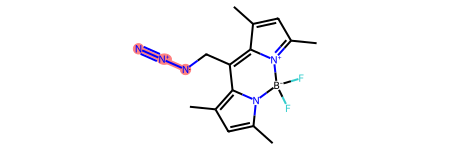

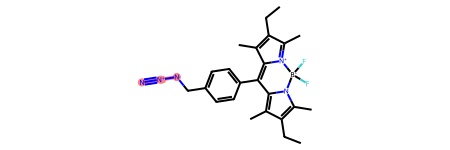

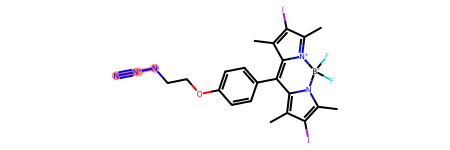

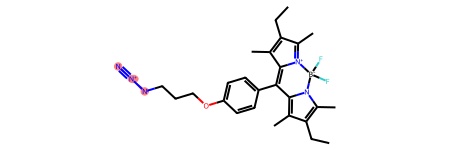

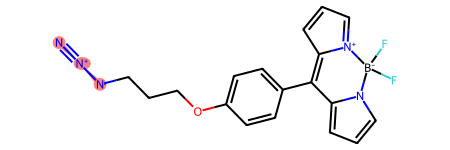

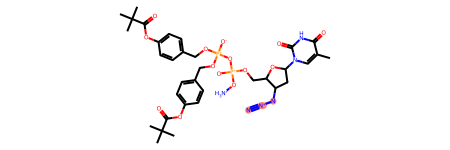

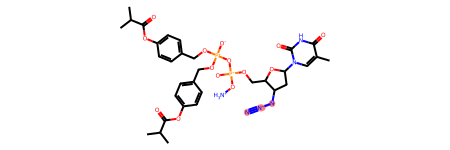

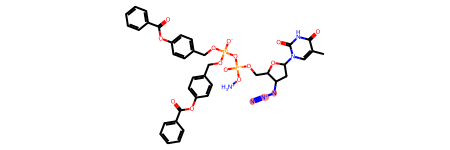

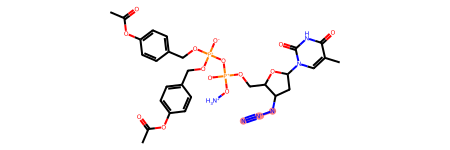

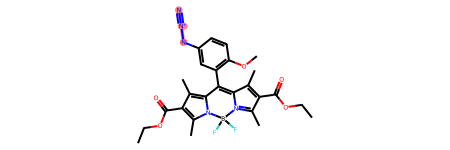

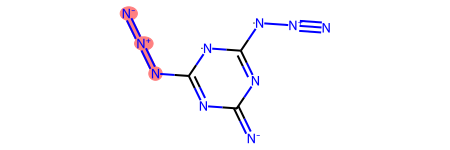

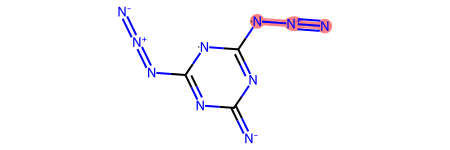

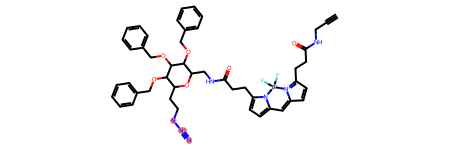

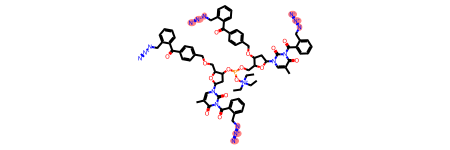

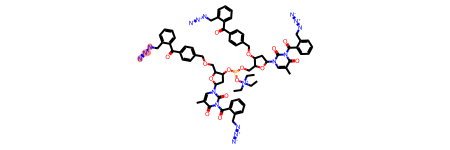

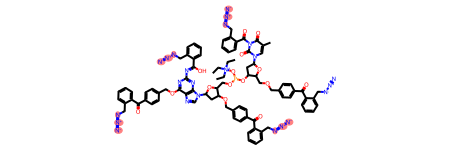

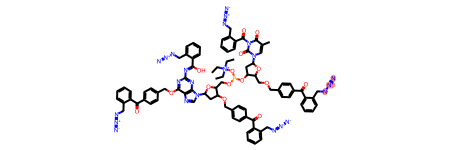

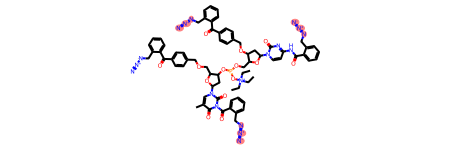

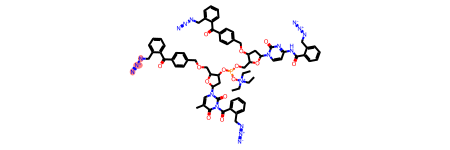

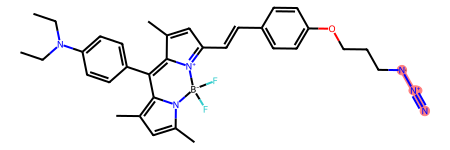

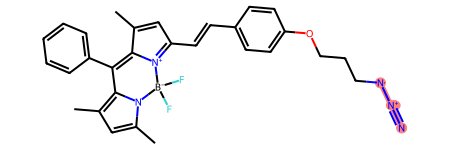

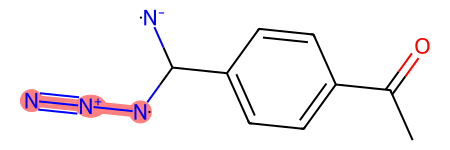

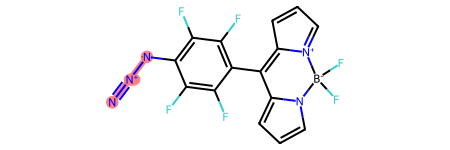

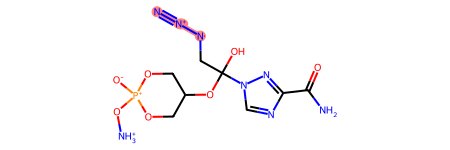

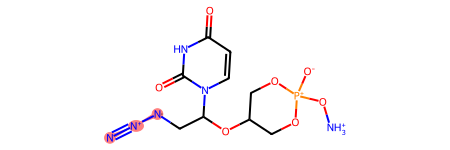

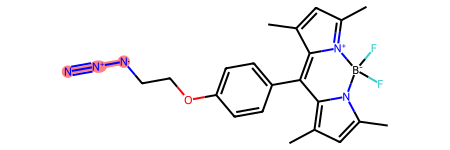

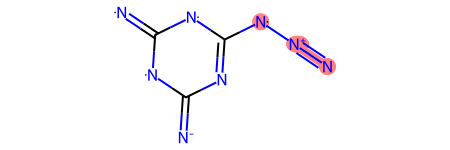

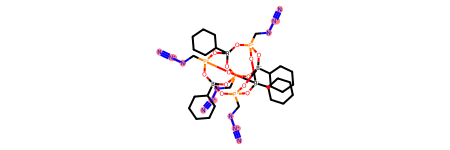

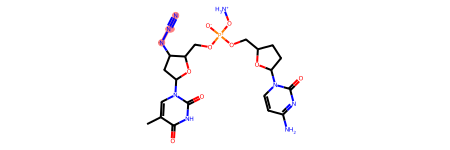

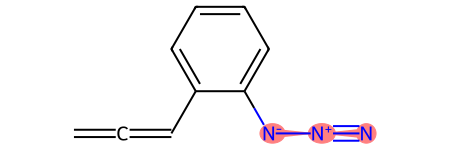

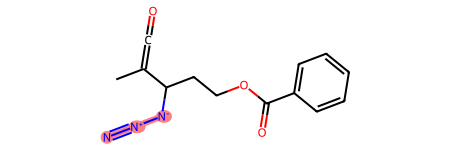

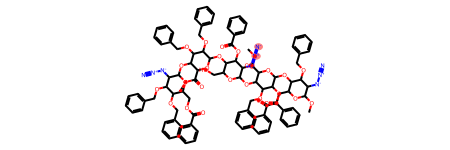

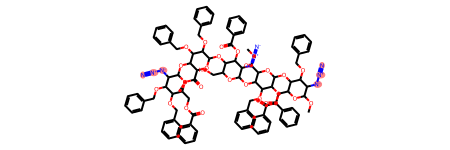

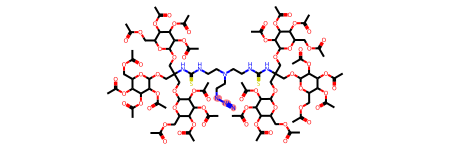

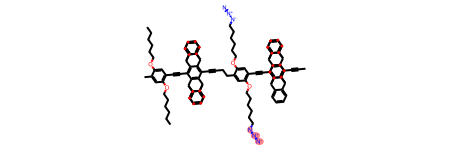

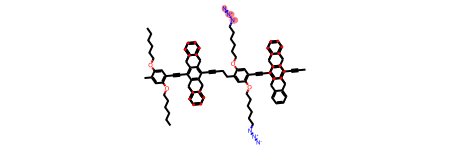

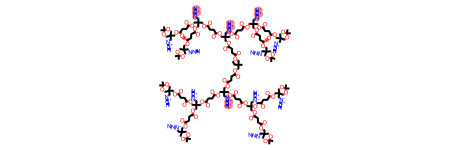

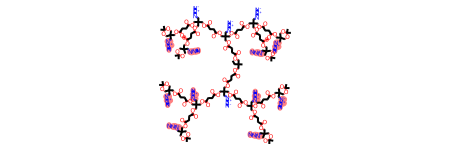

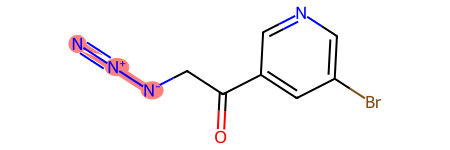

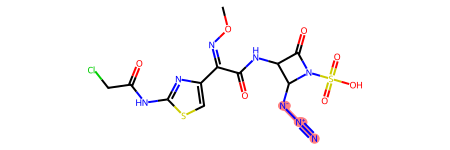

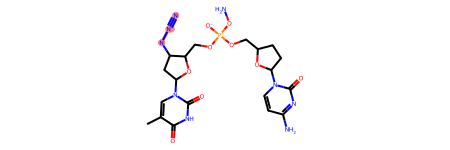

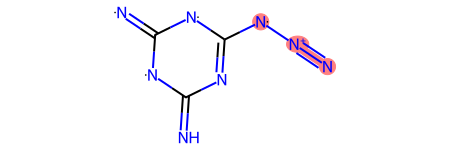

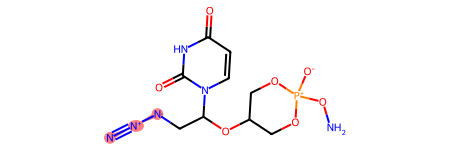

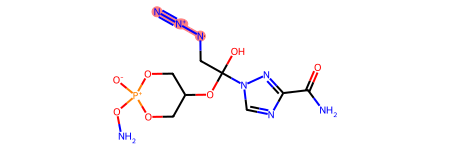

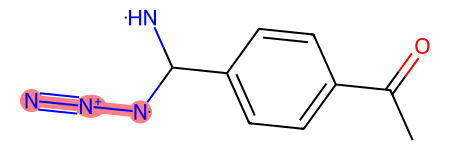

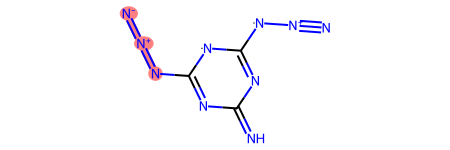

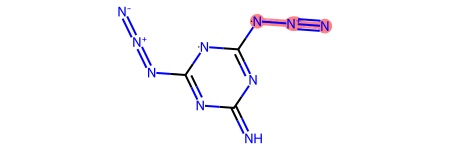

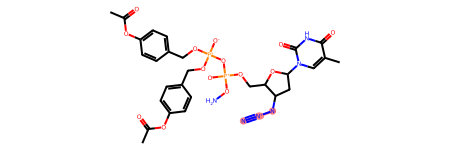

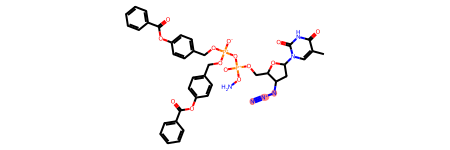

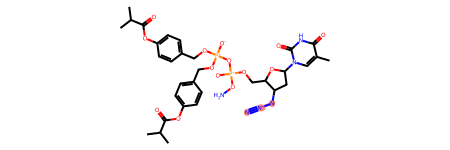

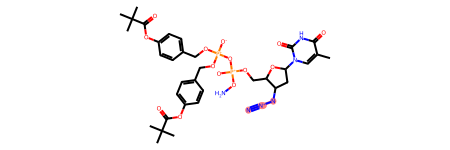

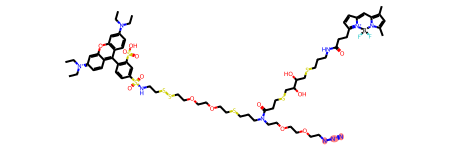

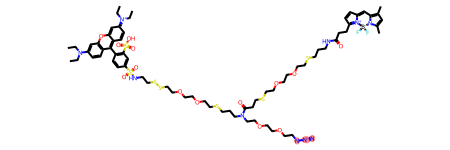

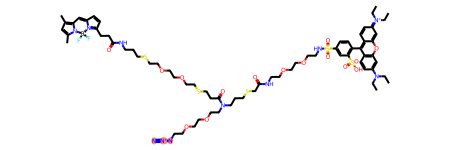

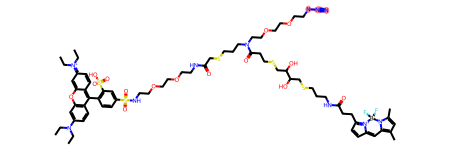

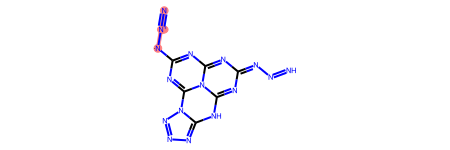

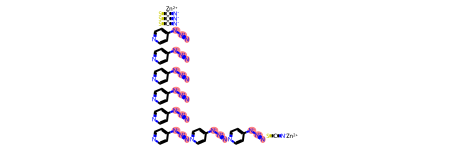

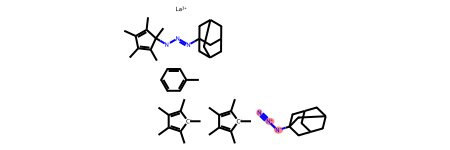

154


In [ ]:
i=0

for s in smiles:
  mol = Chem.MolFromSmiles(s)
  if mol.GetSubstructMatches(Chem.MolFromSmarts('[N;X2]=[N+]=[N-,X1]')):
    display(mol)
    i+=1
  if mol.GetSubstructMatches(Chem.MolFromSmarts('[N;X2]-N#N')):
    display(mol)
    i+=1
print(i)

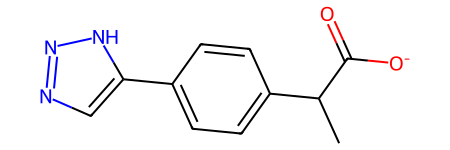

In [ ]:

template = 'N1N=NC=C1c2ccc(C(C)C(=O)[O-])cc2'
mol = Chem.MolFromSmiles(template)
mol

In [ ]:
newsmiles=[]
for smi in smiles[:1500]:

    if 'N=[N+]=[N-]'  in smi:
        newsmi=smi.replace('N=[N+]=[N-]',template)
        newsmiles.append(newsmi)
    else:
        continue
print(len(newsmiles))

25


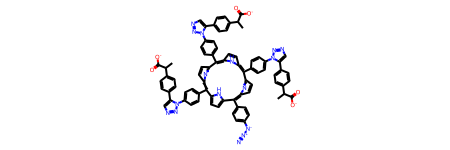

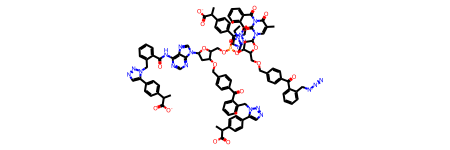

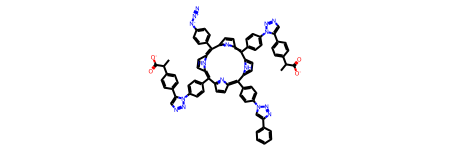

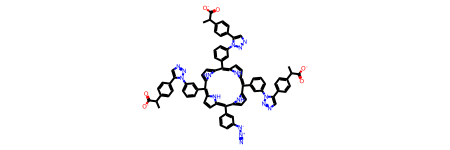

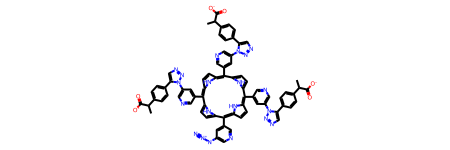

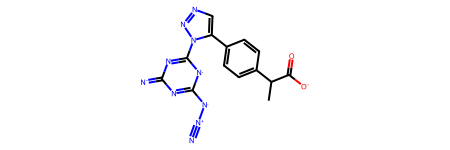

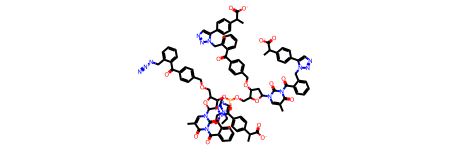

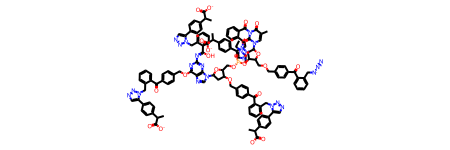

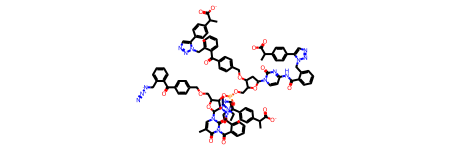

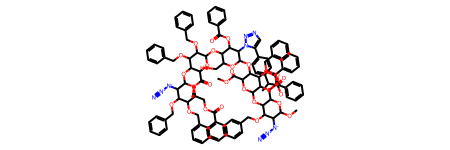

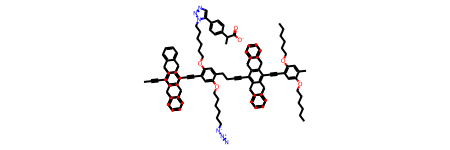

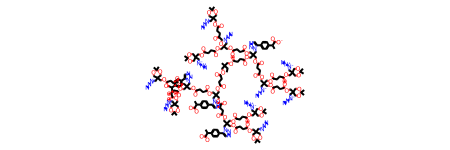

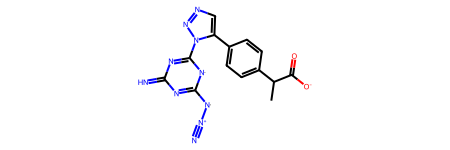

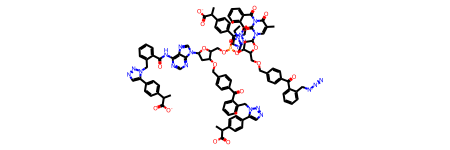

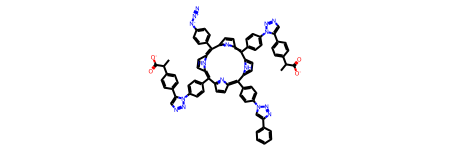

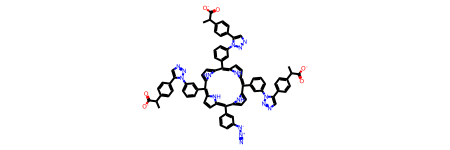

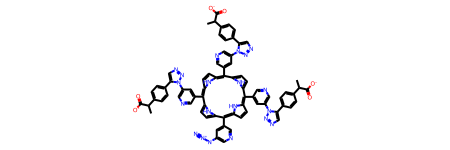

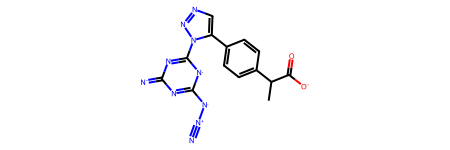

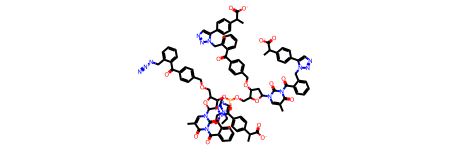

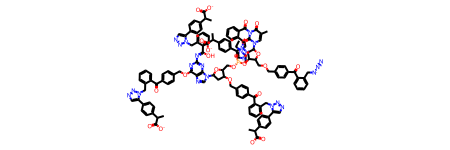

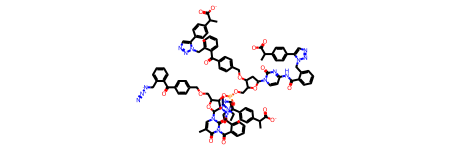

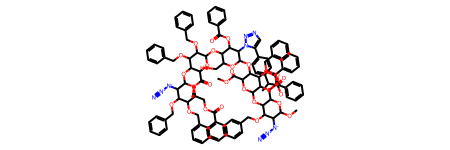

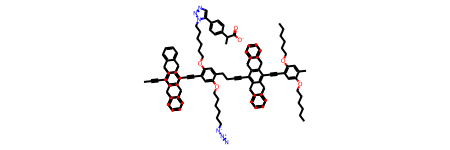

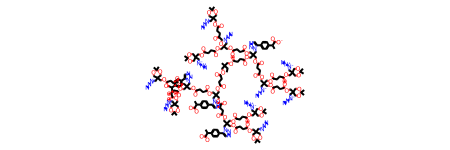

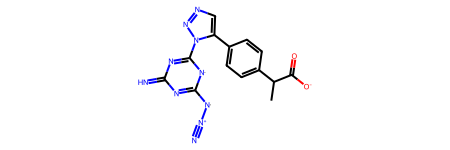

In [ ]:
for s in newsmiles:
  display(Chem.MolFromSmiles(s))

In [ ]:
smiles

array(['[N-]=[N+]=[N-].[N-]=[N+]=[N-].[Ba+2]', '[N-]=[N+]=[N-].[Rb+]',
       '[N-]=[N+]=[N-].[Cs+]', '[N-]=[N+]=[N-].[Ag+]',
       'CCN(CC)P(=N[N+]#N)(N(CC)CC)N(CC)CC.[Br-]', '[N-]=[N+]=[N-].[Na+]',
       'C1=CC(=S=S=C2C=CC(=N[N+]#N)C=C2)C=CC1=NN=[N-]',
       'C1(=C(C(=O)C(=N[N+]#N)C(=NN=[N-])C1=O)N=[N+]=[N-])N=[N+]=[N-]',
       '[N-]=[N+]=[N-].[N-]=[N+]=[N-].[Cu+2]',
       'C1=CC=C2C(=C1)C(=O)C(=NN=[N-])C(=N[N+]#N)C2=O',
       '[N-]=[N+]=[N-].[Rb+]', '[N-]=[N+]=[N-].[Cs+]',
       '[N-]=[N+]=[N-].[Ag+]', 'CCN(CC)P(=N[N+]#N)(N(CC)CC)N(CC)CC.[Br-]',
       '[N-]=[N+]=[N-].[Na+]',
       'C1=CC(=S=S=C2C=CC(=N[N+]#N)C=C2)C=CC1=NN=[N-]',
       'C1(=C(C(=O)C(=N[N+]#N)C(=NN=[N-])C1=O)N=[N+]=[N-])N=[N+]=[N-]',
       '[N-]=[N+]=[N-].[N-]=[N+]=[N-].[Cu+2]',
       'C1=CC=C2C(=C1)C(=O)C(=NN=[N-])C(=N[N+]#N)C2=O',
       'C1=CN(C=CC1=N[N+]#N)[O-]'], dtype=object)